# Time Series Forecasting

### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pycaret.time_series import *
import logging

mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')
logging.disable(logging.CRITICAL)

### Loading the Dataset

In [2]:
data = pd.read_csv('mauna_loa_co2.csv', index_col = 'datetime',
                   parse_dates = True) 
data.head(10)

,CO2
datetime,
1958-03-31,315.70
1958-04-30,317.45
1958-05-31,317.51
1958-06-30,317.25
1958-07-31,315.86
1958-08-31,314.93
1958-09-30,313.21
1958-10-31,312.44
1958-11-30,313.33


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 1958-03-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     766 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


### Time Series Analysis

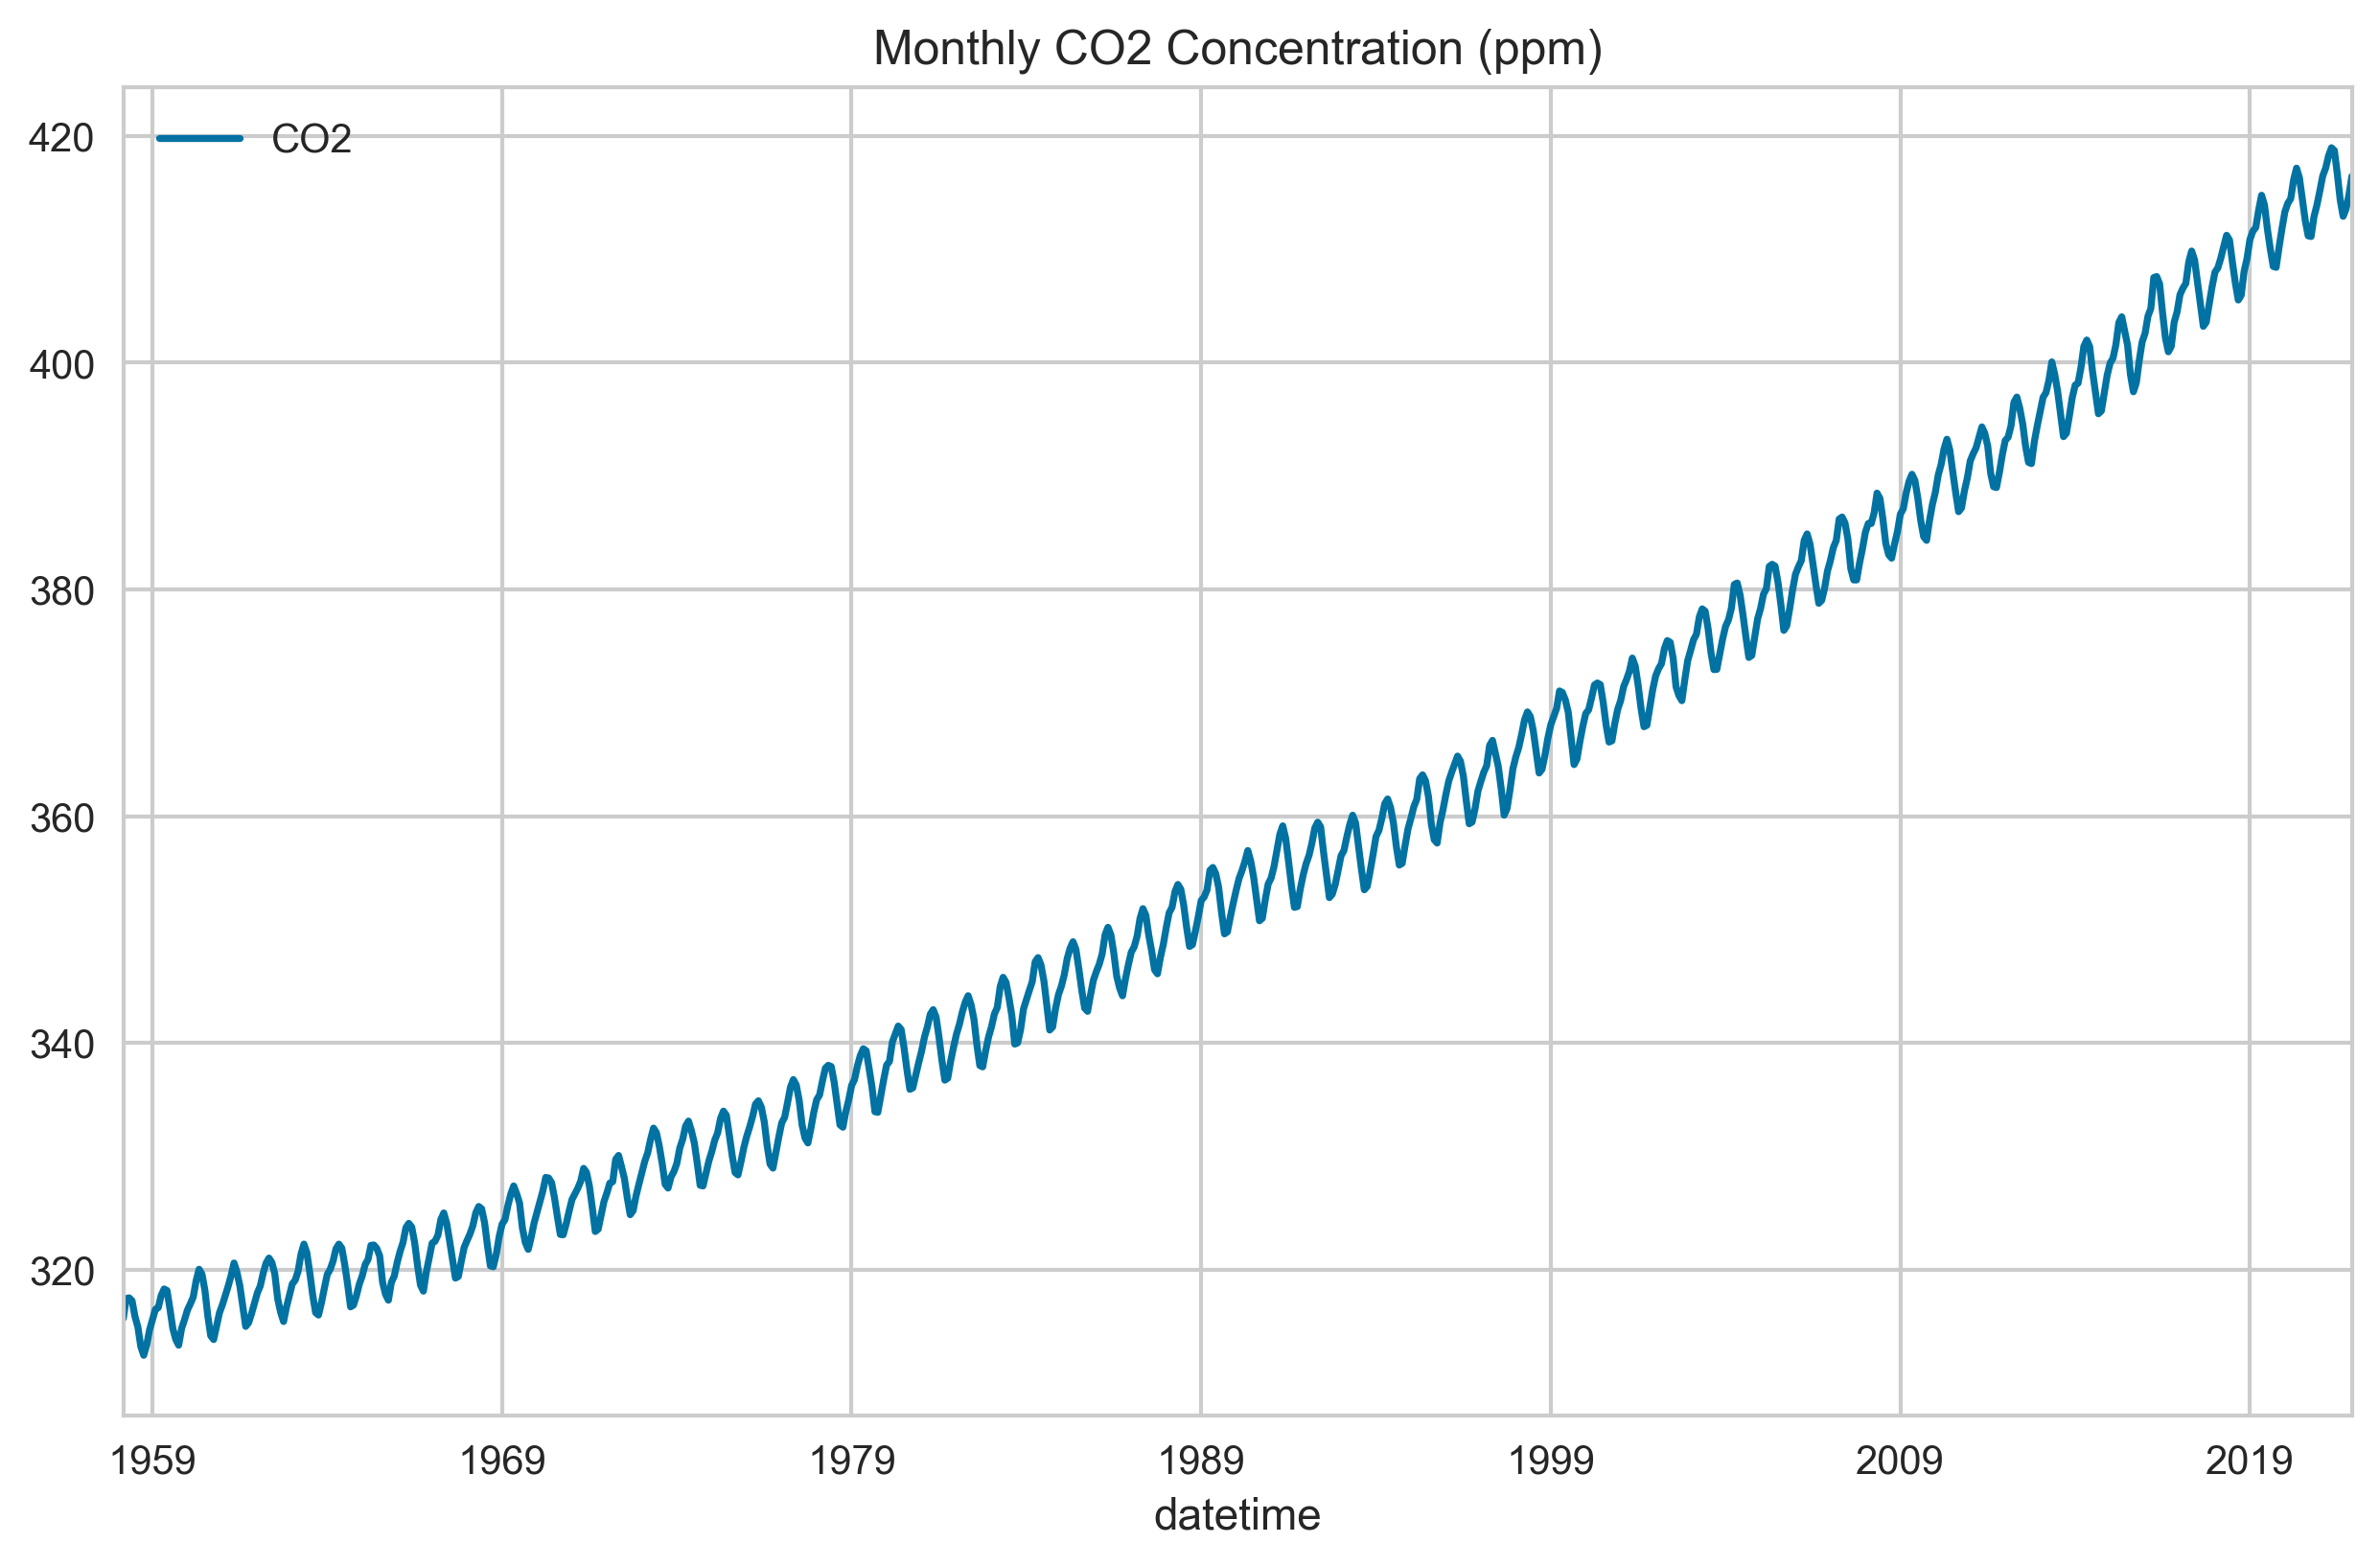

In [4]:
data.plot(figsize = (10,6))
plt.title('Monthly CO2 Concentration (ppm)')

plt.show()

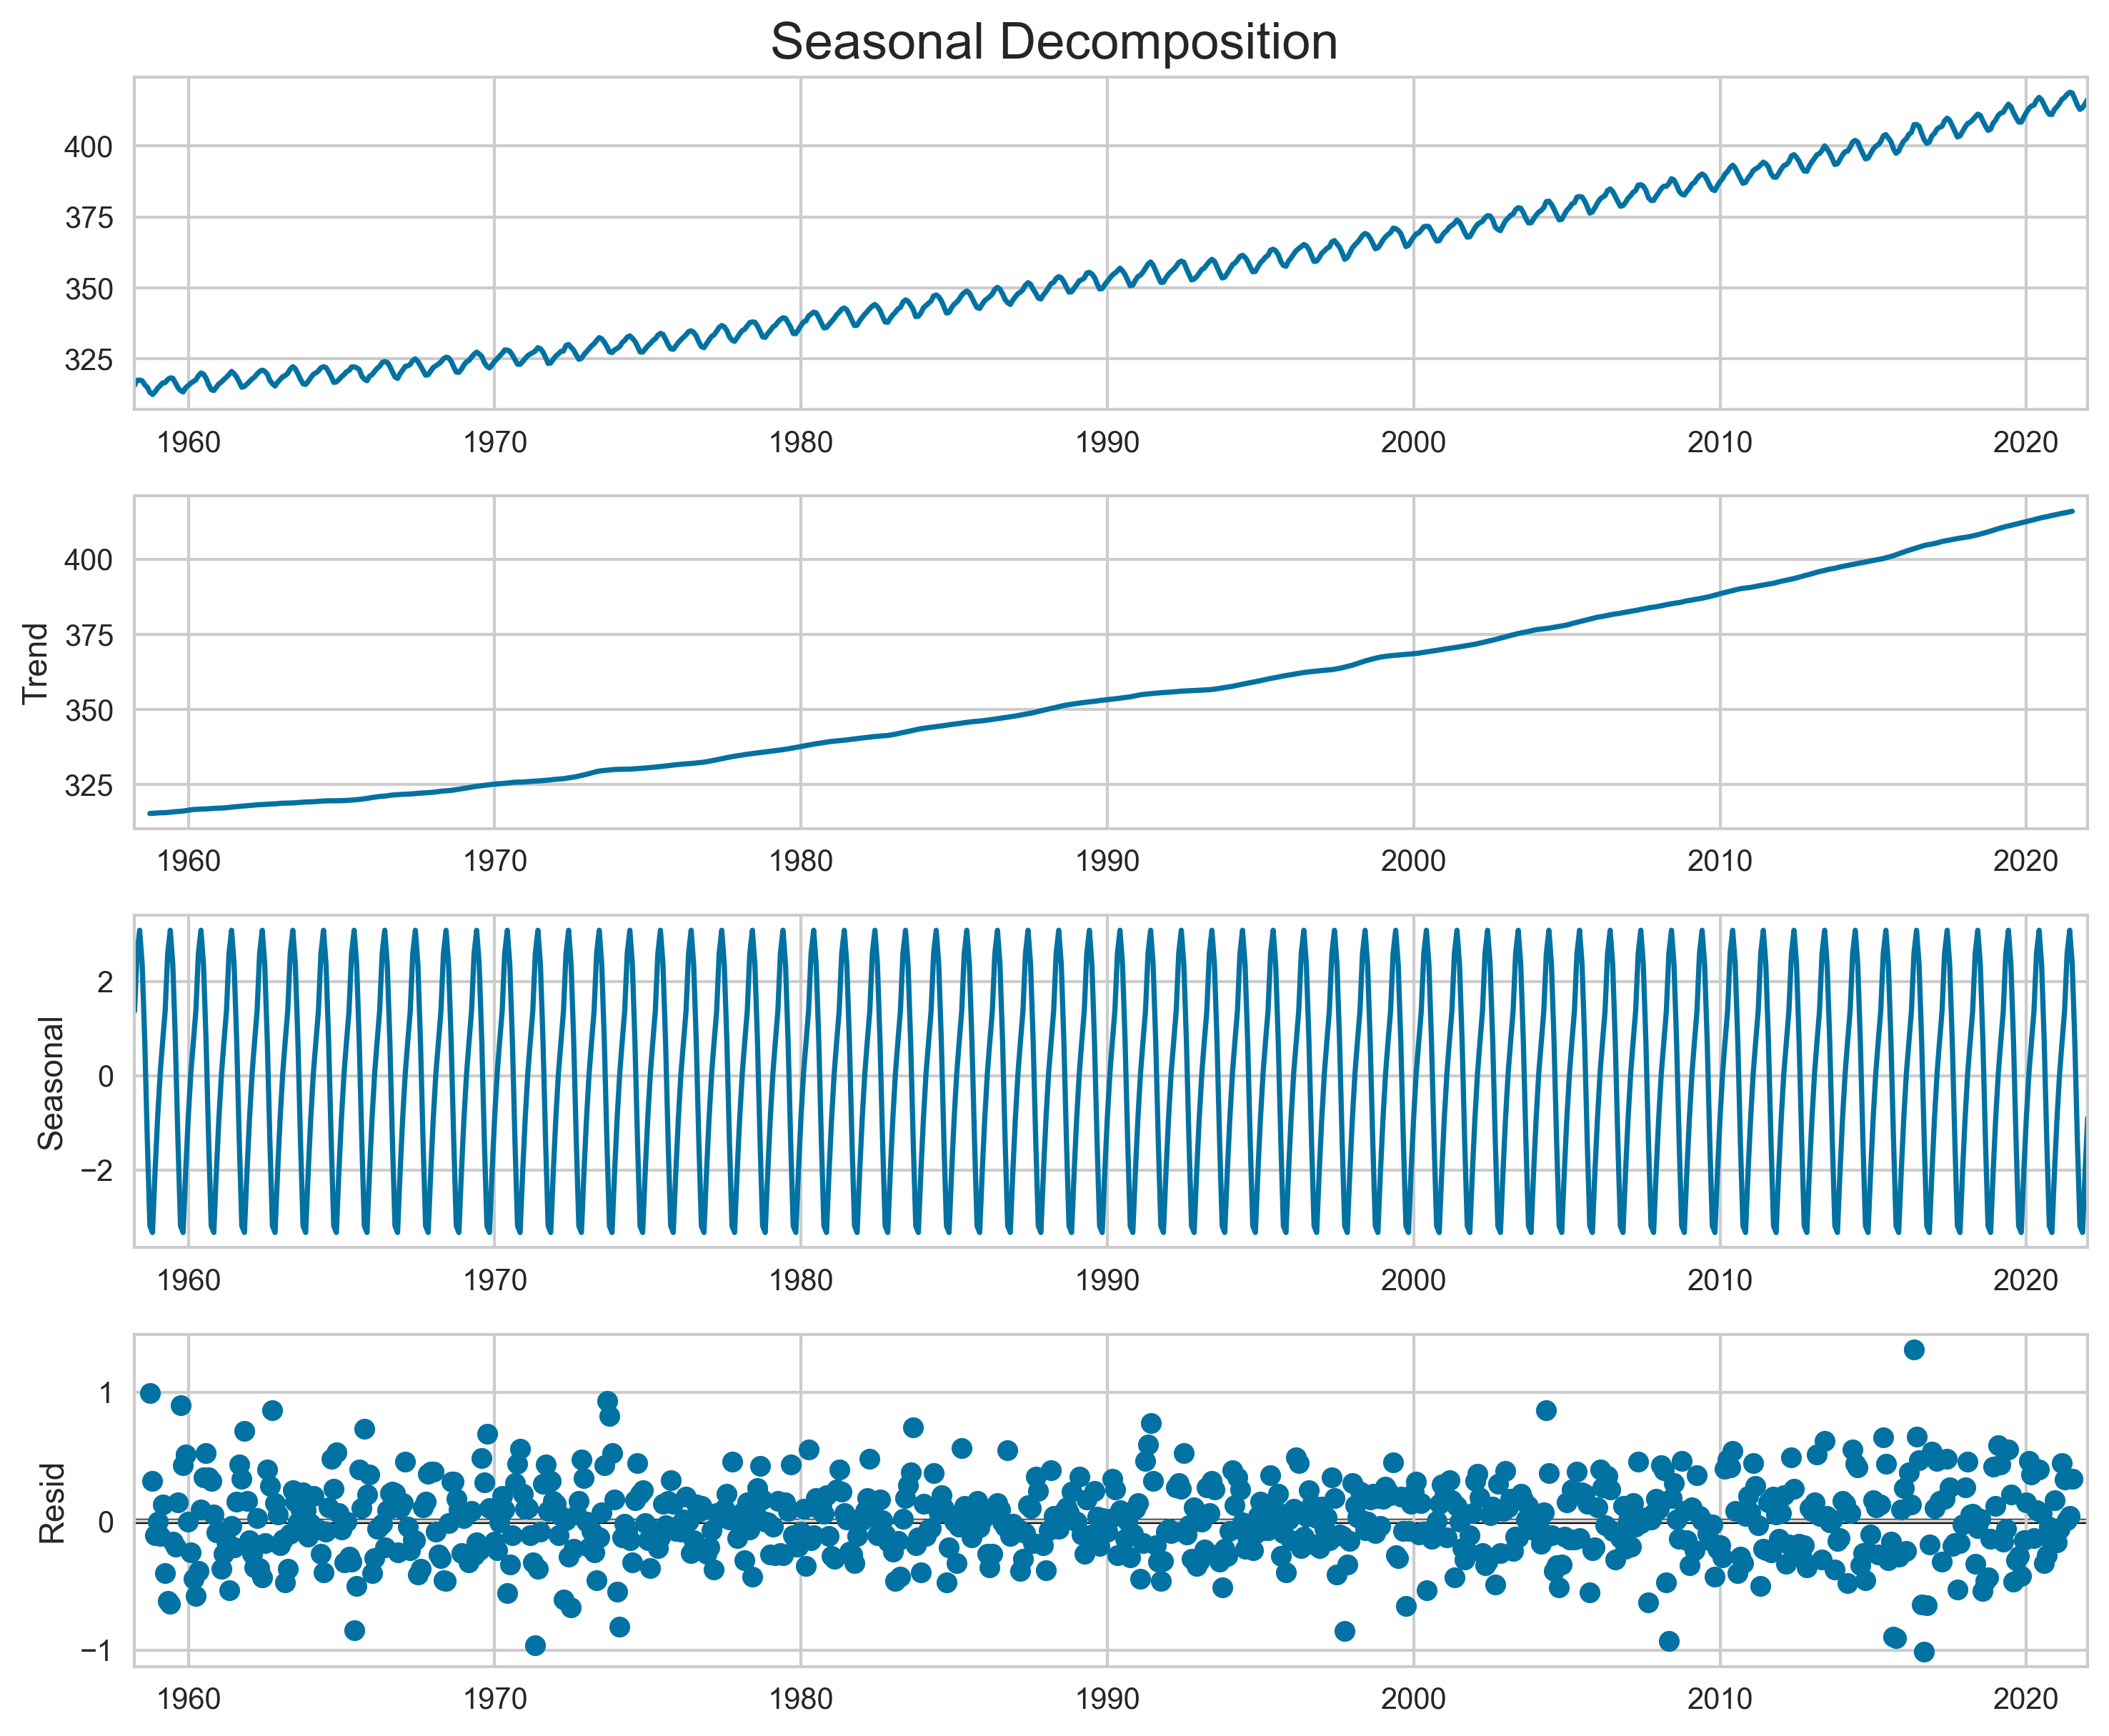

In [5]:
mpl.rcParams['figure.figsize'] = (10, 8)
result = seasonal_decompose(data)

result.plot().suptitle('Seasonal Decomposition', y = 1.01, size = 'x-large')
plt.show()

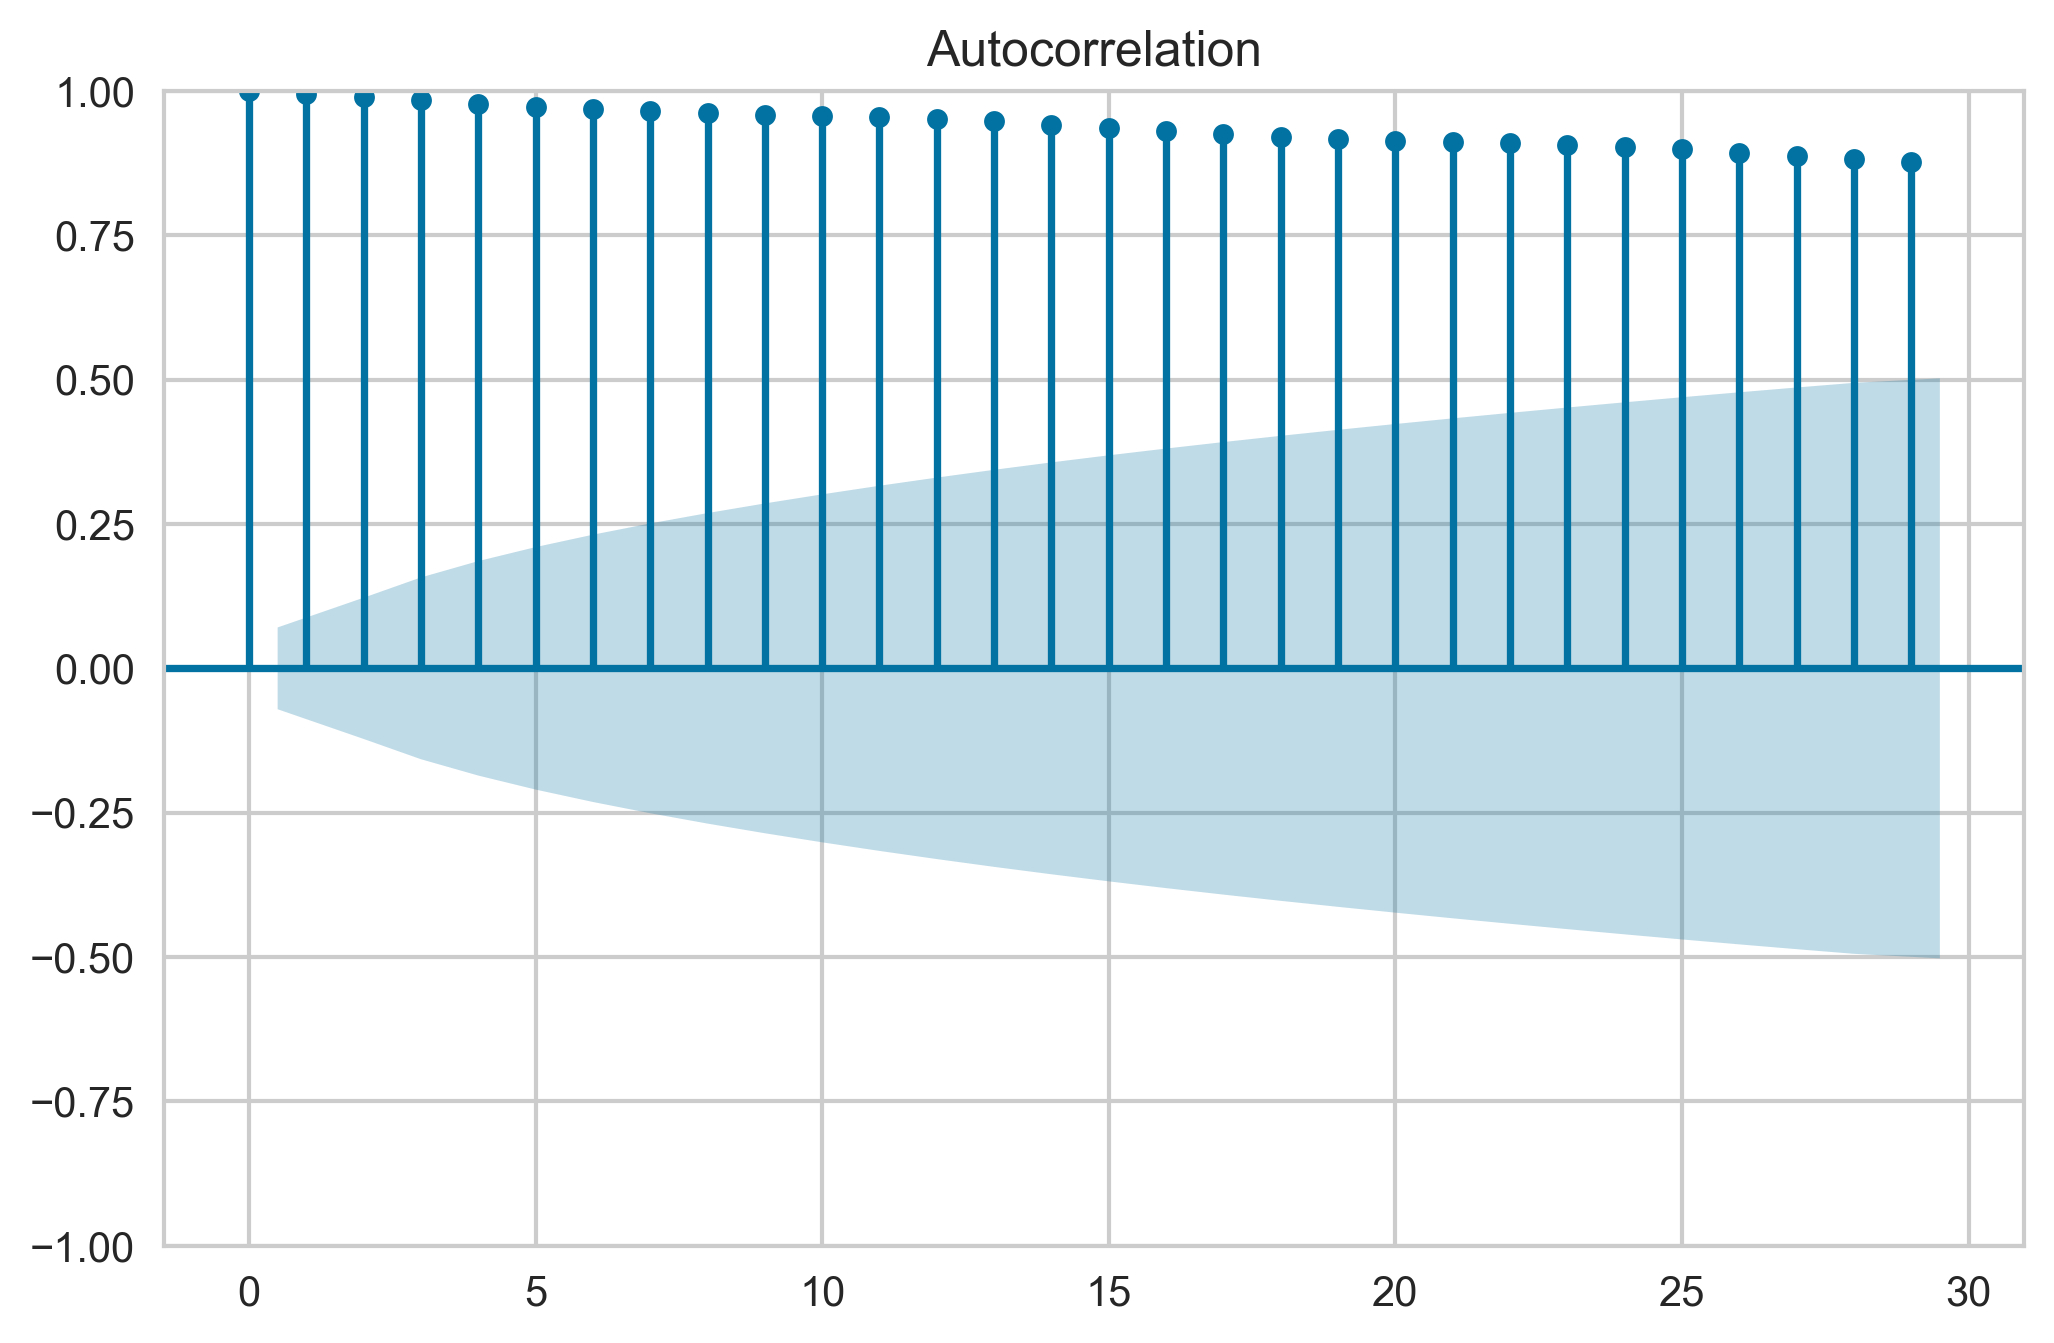

In [6]:
fig, ax = plt.subplots(figsize = (8,5))

plot_acf(data, ax = ax)

plt.show()

### Initializing the PyCaret Environment

In [7]:
ts = setup(data, fh = 36, session_id = 6501)

,Description,Value
0,session_id,6501
1,Target,CO2
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(766, 1)"
5,Transformed data shape,"(766, 1)"
6,Transformed train set shape,"(730, 1)"
7,Transformed test set shape,"(36, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


### Running Statistical Tests

In [8]:
check_stats(test = 'stationarity')

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,ADF,Transformed,Stationarity,{'alpha': 0.05},False
1,Stationarity,ADF,Transformed,p-value,{'alpha': 0.05},1.0
2,Stationarity,ADF,Transformed,Test Statistic,{'alpha': 0.05},5.383263
3,Stationarity,ADF,Transformed,Critical Value 1%,{'alpha': 0.05},-3.439158
4,Stationarity,ADF,Transformed,Critical Value 5%,{'alpha': 0.05},-2.865427
5,Stationarity,ADF,Transformed,Critical Value 10%,{'alpha': 0.05},-2.56884
6,Stationarity,KPSS,Transformed,Trend Stationarity,{'alpha': 0.05},False
7,Stationarity,KPSS,Transformed,p-value,{'alpha': 0.05},0.01
8,Stationarity,KPSS,Transformed,Test Statistic,{'alpha': 0.05},1.035972
9,Stationarity,KPSS,Transformed,Critical Value 10%,{'alpha': 0.05},0.119


### Comparing Forecasting Models

In [15]:
compare_models(sort = 'MAPE')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.2982,0.3303,0.4355,0.5350,0.0011,0.0011,0.9552,0.1000
ets,ETS,0.2986,0.3307,0.4359,0.5355,0.0011,0.0011,0.9552,0.5033
auto_arima,Auto ARIMA,0.4469,0.4562,0.6546,0.7408,0.0016,0.0016,0.9151,36.5867
arima,ARIMA,1.0752,1.0490,1.5782,1.7067,0.0039,0.0040,0.5539,0.8700
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.1630,1.1549,1.7009,1.8730,0.0043,0.0043,0.4678,0.5767
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.1701,1.1608,1.7113,1.8828,0.0043,0.0043,0.4623,0.4333
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.1630,1.1549,1.7009,1.8730,0.0043,0.0043,0.4678,0.5600
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.1670,1.1582,1.7067,1.8784,0.0043,0.0043,0.4647,0.5433
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.3090,1.2534,1.9214,2.0396,0.0048,0.0048,0.3594,0.4567
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.3175,1.3311,1.9245,2.1565,0.0048,0.0048,0.2929,0.4167


Processing:   0%|          | 0/125 [00:00<?, ?it/s]

### Creating the Model

In [10]:
model = create_model('exp_smooth')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2009-12,0.3640,0.3891,0.5163,0.6130,0.0013,0.0013,0.9381
1,2012-12,0.2173,0.2625,0.3178,0.4256,0.0008,0.0008,0.9737
2,2015-12,0.3134,0.3394,0.4723,0.5664,0.0012,0.0012,0.9539
Mean,NaT,0.2982,0.3303,0.4355,0.5350,0.0011,0.0011,0.9552
SD,NaT,0.0608,0.0521,0.0851,0.0797,0.0002,0.0002,0.0146


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Plotting the Model

In [11]:
fig_kwargs={'renderer': 'jupyterlab',
            'height': 1000, 'width': 1000}

plot_model(model, 'diagnostics', fig_kwargs = fig_kwargs)

### Making Predictions

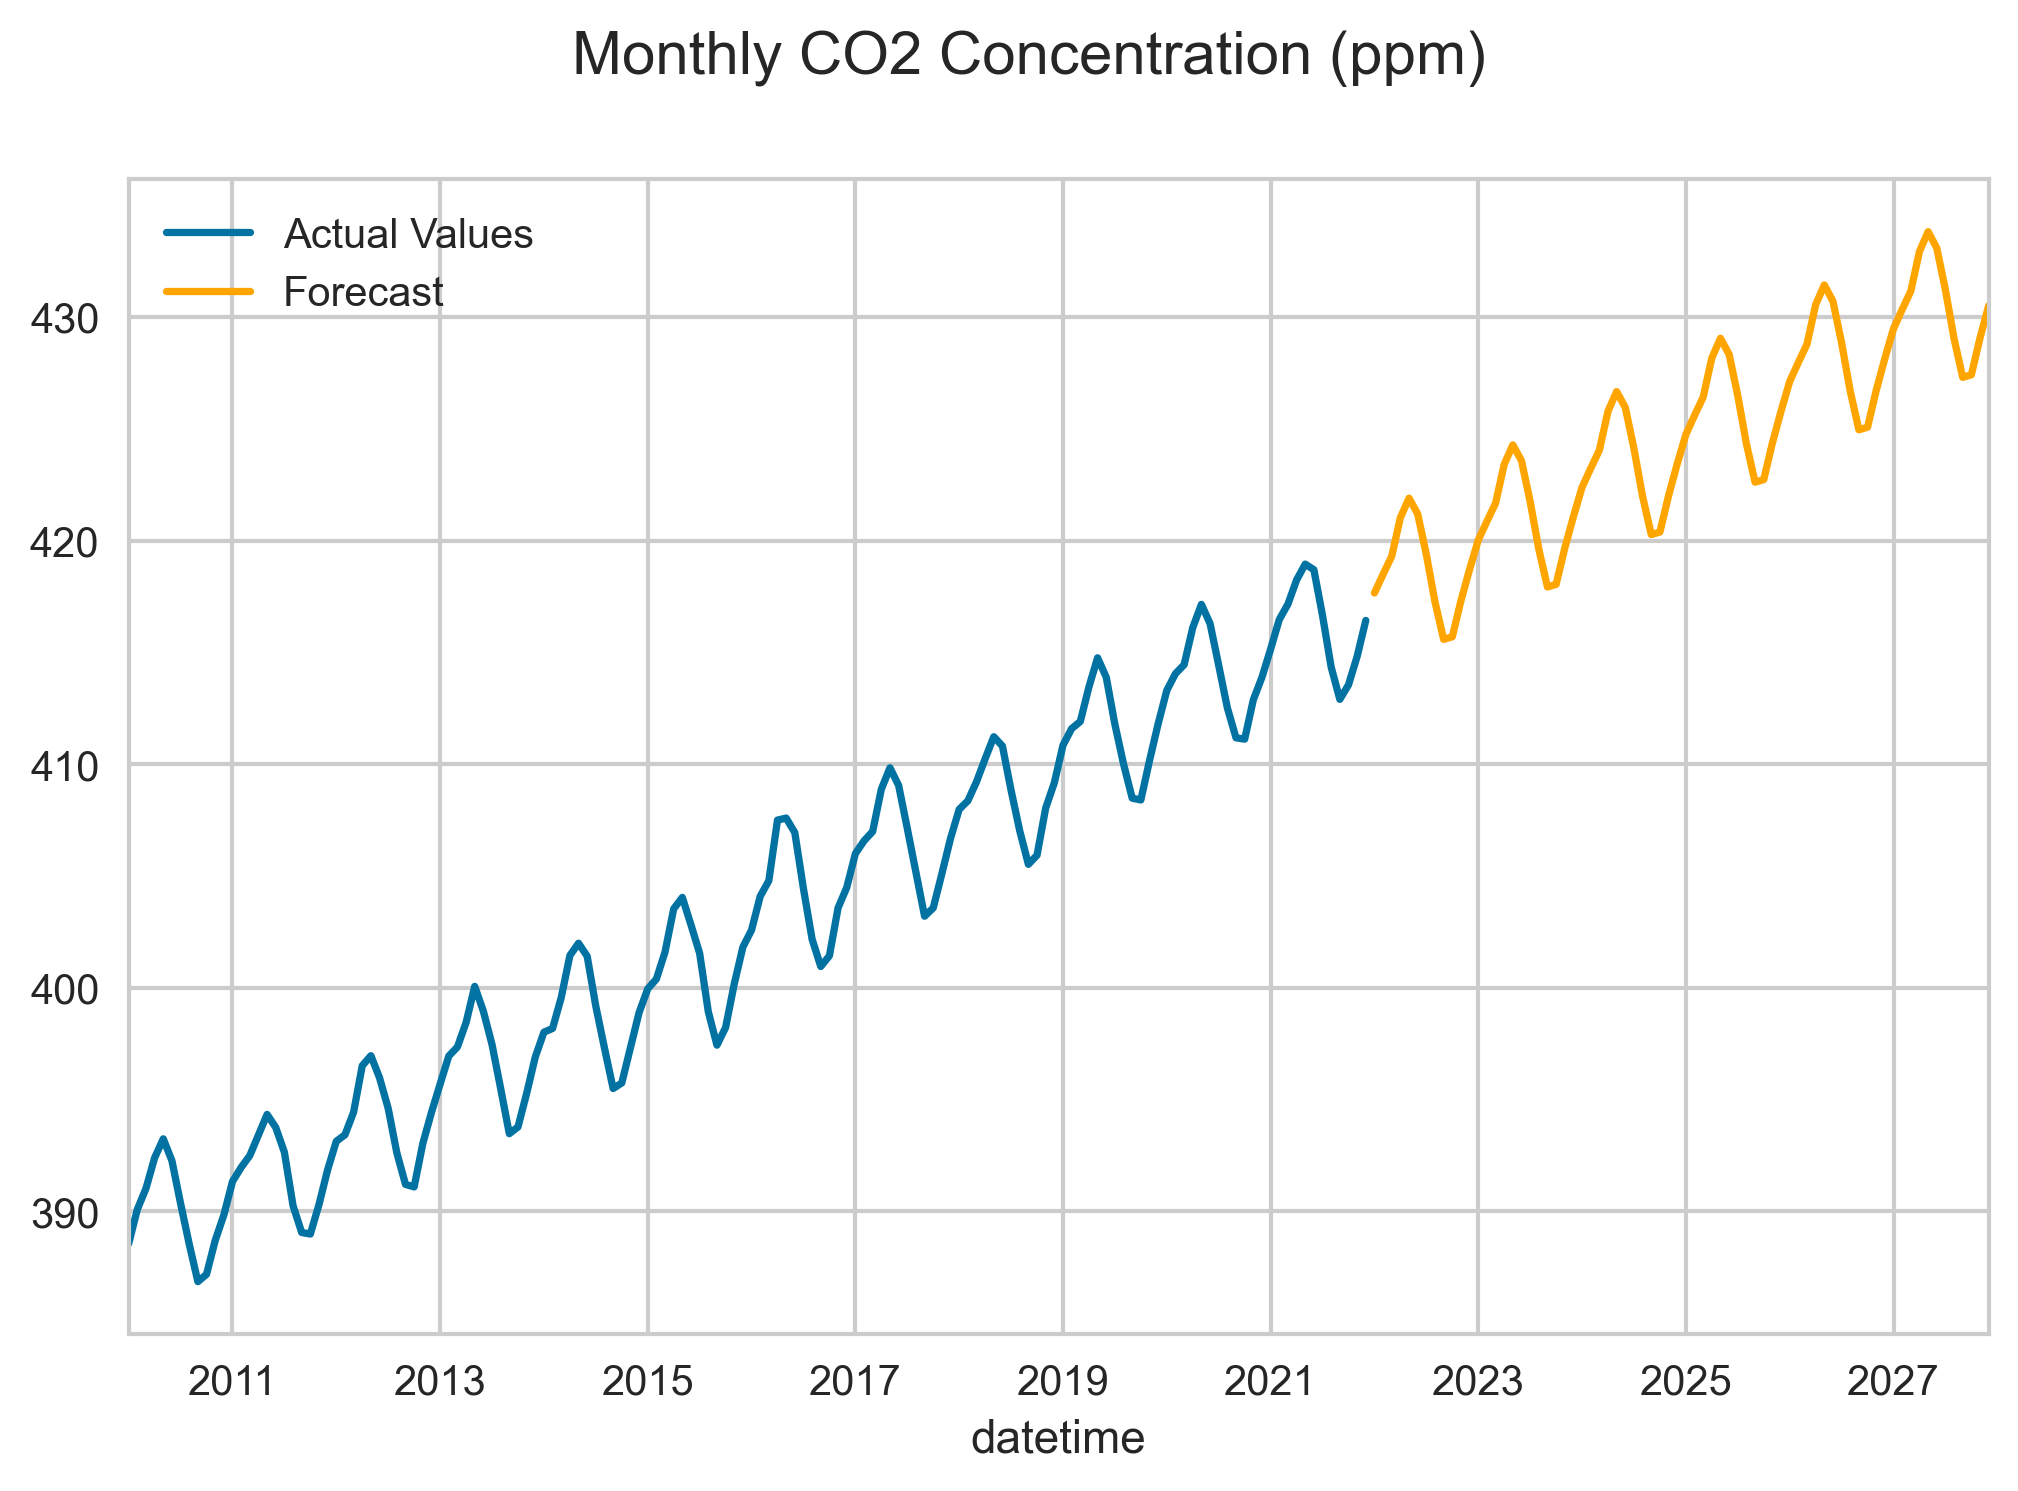

In [12]:
model = finalize_model(model)
pred = predict_model(model, fh = 72)

fig, ax = plt.subplots(figsize = (8,5))
fig.suptitle('Monthly CO2 Concentration (ppm)')

data[-144:].plot(ax = ax)
pred.plot(ax = ax, color = 'orange')
ax.legend(['Actual Values', 'Forecast'])
plt.show()

In [13]:
save_model(model, "exp_smooth_model", verbose = True)

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ExponentialSmoothing(seasonal='mul',
                                                                                      sp=12,
                                                                                      trend='add'))]))]),
 'exp_smooth_model.pkl')